### Importing Python Libraries

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import inspect
from sklearn import metrics
from collections import defaultdict
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from sklearn.neural_network import MLPClassifier

import dt
%run dt.py

### Seed Value

In [69]:
seed=1234

### Loading Dataset

In [70]:
wine_data = load_wine()
inputs = wine_data.data
output = wine_data.target
data= pd.DataFrame(inputs, columns=wine_data.feature_names)
data = pd.concat([data, pd.DataFrame(output)], axis=1)
data.columns=["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline", "Class"]
feature=["Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline", "Class"]
data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### Coding Decision Tree Classifier from Scratch
Source: https://github.com/Suji04/ML_from_Scratch/blob/master/decision%20tree%20classification.ipynb

### Splitting data into test and training set

In [71]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=seed)

### Fitting Decision Tree Classifier

In [72]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_9 <= 3.8 ? 0.2645116124059378
 left:X_11 <= 3.64 ? 0.07231127745215724
  left:1.0
  right:0.0
 right:X_6 <= 1.57 ? 0.43980195628547275
  left:2.0
  right:0.0


### Computing accuracy of the Decision Tree Classifier

In [73]:
Y_pred = classifier.predict(X_test) 
accuracy_score(Y_test, Y_pred)

0.8333333333333334

### Finetuning Hyperparameter for Decision Tree Classifier

In [36]:
param_dist={
    "criterion":["gini","entropy"],
    "min_samples_split":[2,3,4,5,6],
    "max_depth":[2,3,4,5,6]
}
grid=GridSearchCV(classifier, param_dist, cv=10, verbose=3, scoring='accuracy')
best_model=grid.fit(X_train,Y_train)
print('')
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print("Best Score is {}".format(grid.best_score_))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.867, total=   1.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.867, total=   1.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.857, total=   1.2s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.857, total=   1.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.929, total=   1.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.929, total=   1.2s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.857, total=   1.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.857, total=   1.1s
[CV] criterion=gini, max_depth=2, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=2, min_samples_split=2, score=0.786, total= 

[CV]  criterion=gini, max_depth=3, min_samples_split=2, score=1.000, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=3, min_samples_split=2, score=0.929, total=   1.6s
[CV] criterion=gini, max_depth=3, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=3, min_samples_split=2, score=0.929, total=   1.3s
[CV] criterion=gini, max_depth=3, min_samples_split=2 ................
[CV]  criterion=gini, max_depth=3, min_samples_split=2, score=0.857, total=   1.5s
[CV] criterion=gini, max_depth=3, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=3, min_samples_split=3, score=0.933, total=   1.5s
[CV] criterion=gini, max_depth=3, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=3, min_samples_split=3, score=0.933, total=   1.4s
[CV] criterion=gini, max_depth=3, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=3, min_samples_split=3, score=0.857, total= 

[CV]  criterion=gini, max_depth=4, min_samples_split=3, score=0.933, total=   1.8s
[CV] criterion=gini, max_depth=4, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=3, score=0.933, total=   1.8s
[CV] criterion=gini, max_depth=4, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=3, score=0.857, total=   1.6s
[CV] criterion=gini, max_depth=4, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=3, score=0.929, total=   1.6s
[CV] criterion=gini, max_depth=4, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=3, score=1.000, total=   1.6s
[CV] criterion=gini, max_depth=4, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=3, score=1.000, total=   1.6s
[CV] criterion=gini, max_depth=4, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=4, min_samples_split=3, score=1.000, total= 

[CV]  criterion=gini, max_depth=5, min_samples_split=3, score=1.000, total=   1.6s
[CV] criterion=gini, max_depth=5, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=5, min_samples_split=3, score=1.000, total=   1.6s
[CV] criterion=gini, max_depth=5, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=5, min_samples_split=3, score=1.000, total=   1.5s
[CV] criterion=gini, max_depth=5, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=5, min_samples_split=3, score=0.929, total=   1.8s
[CV] criterion=gini, max_depth=5, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=5, min_samples_split=3, score=0.929, total=   1.4s
[CV] criterion=gini, max_depth=5, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=5, min_samples_split=3, score=0.929, total=   1.9s
[CV] criterion=gini, max_depth=5, min_samples_split=4 ................
[CV]  criterion=gini, max_depth=5, min_samples_split=4, score=0.933, total= 

[CV]  criterion=gini, max_depth=6, min_samples_split=3, score=0.929, total=   0.5s
[CV] criterion=gini, max_depth=6, min_samples_split=3 ................
[CV]  criterion=gini, max_depth=6, min_samples_split=3, score=0.929, total=   0.6s
[CV] criterion=gini, max_depth=6, min_samples_split=4 ................
[CV]  criterion=gini, max_depth=6, min_samples_split=4, score=0.933, total=   0.8s
[CV] criterion=gini, max_depth=6, min_samples_split=4 ................
[CV]  criterion=gini, max_depth=6, min_samples_split=4, score=0.933, total=   0.7s
[CV] criterion=gini, max_depth=6, min_samples_split=4 ................
[CV]  criterion=gini, max_depth=6, min_samples_split=4, score=0.857, total=   0.6s
[CV] criterion=gini, max_depth=6, min_samples_split=4 ................
[CV]  criterion=gini, max_depth=6, min_samples_split=4, score=0.929, total=   0.7s
[CV] criterion=gini, max_depth=6, min_samples_split=4 ................
[CV]  criterion=gini, max_depth=6, min_samples_split=4, score=1.000, total= 

[CV]  criterion=entropy, max_depth=2, min_samples_split=4, score=0.867, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=4, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=4, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=4, score=0.929, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=4, score=0.929, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=4, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=2, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=2, min_samples_split=4,

[CV]  criterion=entropy, max_depth=3, min_samples_split=4, score=1.000, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, score=1.000, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, score=1.000, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, score=0.929, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, score=0.929, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, score=0.857, total=   0.5s
[CV] criterion=entropy, max_depth=3, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=3, min_samples_split=5,

[CV]  criterion=entropy, max_depth=4, min_samples_split=4, score=0.929, total=   0.6s
[CV] criterion=entropy, max_depth=4, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=4, min_samples_split=4, score=0.929, total=   0.5s
[CV] criterion=entropy, max_depth=4, min_samples_split=4 .............
[CV]  criterion=entropy, max_depth=4, min_samples_split=4, score=0.929, total=   0.6s
[CV] criterion=entropy, max_depth=4, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=4, min_samples_split=5, score=0.933, total=   0.6s
[CV] criterion=entropy, max_depth=4, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=4, min_samples_split=5, score=0.933, total=   0.6s
[CV] criterion=entropy, max_depth=4, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=4, min_samples_split=5, score=0.857, total=   0.5s
[CV] criterion=entropy, max_depth=4, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=4, min_samples_split=5,

[CV]  criterion=entropy, max_depth=5, min_samples_split=5, score=0.933, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=5, score=0.933, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=5, score=0.857, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=5, score=0.929, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=5, score=1.000, total=   0.5s
[CV] criterion=entropy, max_depth=5, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=5, score=1.000, total=   0.6s
[CV] criterion=entropy, max_depth=5, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=5, min_samples_split=5,

[CV]  criterion=entropy, max_depth=6, min_samples_split=5, score=0.929, total=   0.7s
[CV] criterion=entropy, max_depth=6, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=6, min_samples_split=5, score=1.000, total=   0.6s
[CV] criterion=entropy, max_depth=6, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=6, min_samples_split=5, score=1.000, total=   0.6s
[CV] criterion=entropy, max_depth=6, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=6, min_samples_split=5, score=1.000, total=   0.6s
[CV] criterion=entropy, max_depth=6, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=6, min_samples_split=5, score=0.929, total=   0.6s
[CV] criterion=entropy, max_depth=6, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=6, min_samples_split=5, score=0.929, total=   0.5s
[CV] criterion=entropy, max_depth=6, min_samples_split=5 .............
[CV]  criterion=entropy, max_depth=6, min_samples_split=5,

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.2min finished



Best criterion: gini
Best max_depth: 4
Best min_samples_split: 2
Best Score is 0.9438095238095239


### Computing the following evaluation metrics: Confusion Matrix, Accuracy, F-score, ROC curve for DT

0.8333333333333334
The accuracy score of the Decision Tree is 0.8333333333333334

0.9166666666666666
The accuracy score of the Decision Tree is 0.9166666666666666



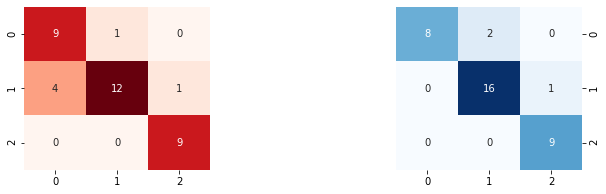

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.89      0.94      0.91        17
           2       0.90      1.00      0.95         9

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



In [45]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=seed)

DTT_bfr=DecisionTreeClassifier(min_samples_split=2,max_depth=2,criterion="gini")

DTT_bfr.fit(X_train,Y_train)

p_Y_bfr=DTT_bfr.predict(X_test)

print(accuracy_score(Y_test, p_Y_bfr))
    
Y_pred = DTT_bfr.predict(X_test) 

acc = accuracy_score(Y_test, Y_pred) 
cr = classification_report(Y_test, Y_pred) 
cm = confusion_matrix(Y_test, Y_pred) 

print("The accuracy score of the Decision Tree is", acc); print()
# print(cr)
# sns.heatmap(cm, cmap = "Blues", annot = True, cbar = False, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=seed)

DTT=DecisionTreeClassifier(min_samples_split=best_model.best_estimator_.get_params()['min_samples_split'],max_depth=best_model.best_estimator_.get_params()['max_depth'],criterion=best_model.best_estimator_.get_params()['criterion'])

DTT.fit(X_train,Y_train)

p_Y=DTT.predict(X_test)

print(accuracy_score(Y_test, p_Y))
    
Y_pred = DTT.predict(X_test) 

acc = accuracy_score(Y_test, Y_pred) 
cr = classification_report(Y_test, Y_pred) 
cm2 = confusion_matrix(Y_test, Y_pred) 

print("The accuracy score of the Decision Tree is", acc); print()
# Confusion Matrix Before and After Finetuning
fig, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))
fig.subplots_adjust(wspace = 1)
sns.heatmap(cm, cmap = "Reds", annot = True, cbar = False, ax = axis1, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])
sns.heatmap(cm2, cmap = "Blues", annot = True, cbar = False, ax = axis2, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])
axis2.yaxis.tick_right()
fig.subplots_adjust(wspace = 1)
plt.show()
print(cr)
# sns.heatmap(cm, cmap = "Blues", annot = True, cbar = False, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])

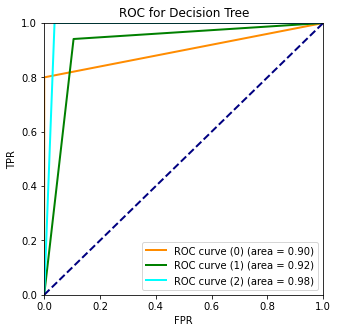

In [46]:
# ROC Decision Tree

fpr = dict()
tpr = dict()
roc_auc = dict()

Y_test = label_binarize(Y_test, classes=[0 ,1, 2])
pred_Y_binarized = label_binarize(Y_pred, classes = [0,1,2])
n_classes = Y_test.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], pred_Y_binarized[:, i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 2
plt.subplots(1, figsize = (5,5))
    
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (0) (area = %0.2f)" % roc_auc[0],
)

plt.plot(
    fpr[1],
    tpr[1],
    color="green",
    lw=lw,
    label="ROC curve (1) (area = %0.2f)" % roc_auc[1],
)

plt.plot(
    fpr[2],
    tpr[2],
    color="cyan",
    lw=lw,
    label="ROC curve (2) (area = %0.2f)" % roc_auc[2],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Decision Tree")
plt.legend(loc="lower right")
plt.show()

### Now we perform the same experiment using KNN

In [50]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
Y=Y.ravel()

#stadardising the data 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=seed)

#activating KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

# computing ROC score and accuracy 
roc_auc_prediction = knn.predict_proba(X_test)
cm = metrics.confusion_matrix(Y_test, prediction)
print(metrics.classification_report(Y_test, prediction))
accuracy = metrics.accuracy_score(Y_test, prediction)
print('')
print("Accuracy: ", accuracy)

#hyperparameters
n_neighbors = list(range(2,15))
p = [1,2]
weights = ['uniform','distance']

hyperparameters = dict(n_neighbors = n_neighbors, p = p, weights = weights)

#new KNN for the finetuned hyperparameter
knn_2 = KNeighborsClassifier()

#use GridSearchCV to find best hyperparameter
clf = GridSearchCV(knn_2, hyperparameters, verbose=3, cv = 10)
best_model = clf.fit(X_train,Y_train)

#displaying best hyperparameters
print('')
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best weights:', best_model.best_estimator_.get_params()['weights'])

#fitting KNN with finetuned hyperparameter
knn2 = KNeighborsClassifier(n_neighbors = best_model.best_estimator_.get_params()['n_neighbors'], weights = best_model.best_estimator_.get_params()['weights'], p = best_model.best_estimator_.get_params()['p'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = seed)
knn2.fit(X_train, Y_train)
prediction2 = knn2.predict(X_test)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        17
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


Accuracy:  0.9722222222222222
Fitting 10 folds for each of 52 candidates, totalling 520 fits
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, weights=uniform, score=0.929, total=   0.0s
[CV] n_neighbors=2, p=1, weights=uniform .............................
[CV] . n_neighbors=2, p=1, w

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=0.929, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV]  n_neighbors=3, p=1, weights=distance, score=0.929, total=   0.0s
[CV] 

[CV] . n_neighbors=6, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=6, p=1, weights=uniform .............................
[CV] . n_neighbors=6, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] n_neighbors=6, p=1, weights=uniform .............................
[CV] . n_neighbors=6, p=1, weights=uniform, score=0.929, total=   0.0s
[CV] n_neighbors=6, p=1, weights=uniform .............................
[CV] . n_neighbors=6, p=1, weights=uniform, score=0.929, total=   0.0s
[CV] n_neighbors=6, p=1, weights=uniform .............................
[CV] . n_neighbors=6, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=6, p=1, weights=uniform .............................
[CV] . n_neighbors=6, p=1, weights=uniform, score=0.929, total=   0.0s
[CV] n_neighbors=6, p=1, weights=uniform .............................
[CV] . n_neighbors=6, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=6, p=1, weights=uniform .............................
[CV] .

[CV] . n_neighbors=8, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=8, p=1, weights=uniform .............................
[CV] . n_neighbors=8, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  n_neighbors=8, p=1, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  n_neighbors=8, p=1, weights=distance, score=0.933, total=   0.0s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  n_neighbors=8, p=1, weights=distance, score=0.929, total=   0.0s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  n_neighbors=8, p=1, weights=distance, score=0.929, total=   0.0s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  n_neighbors=8, p=1, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=8, p=1, weights=distance ............................
[CV]  

[CV]  n_neighbors=10, p=1, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................
[CV]  n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................
[CV]  n_neighbors=10, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................
[CV]  n_neighbors=10, p=2, weights=uniform, score=0.857, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................
[CV]  n_neighbors=10, p=2, weights=uniform, score=0.929, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................
[CV]  n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................
[CV]  n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=10, p=2, weights=uniform ............................
[CV] 

[CV]  n_neighbors=12, p=2, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=12, p=2, weights=distance ...........................
[CV]  n_neighbors=12, p=2, weights=distance, score=0.929, total=   0.0s
[CV] n_neighbors=12, p=2, weights=distance ...........................
[CV]  n_neighbors=12, p=2, weights=distance, score=1.000, total=   0.0s
[CV] n_neighbors=12, p=2, weights=distance ...........................
[CV]  n_neighbors=12, p=2, weights=distance, score=0.929, total=   0.0s
[CV] n_neighbors=13, p=1, weights=uniform ............................
[CV]  n_neighbors=13, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] n_neighbors=13, p=1, weights=uniform ............................
[CV]  n_neighbors=13, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] n_neighbors=13, p=1, weights=uniform ............................
[CV]  n_neighbors=13, p=1, weights=uniform, score=0.929, total=   0.0s
[CV] n_neighbors=13, p=1, weights=uniform ............................
[C

[Parallel(n_jobs=1)]: Done 520 out of 520 | elapsed:    1.9s finished


### Computing the following evaluation metrics: Confusion Matrix, Accuracy, F-score, ROC curve for KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        17
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


Accuracy Score: 0.9722222222222222
Test Score for 10-Fold CV: [0.94444444 0.94444444 0.94444444 0.94444444 1.         1.
 1.         1.         1.         1.        ]

Heatmap of Confusion Matrix Before and After Finetuning:


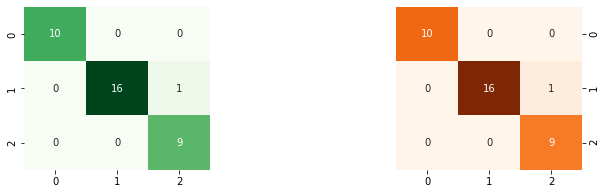

In [585]:
# ROC Score
roc_auc_prediction2 = knn2.predict_proba(X_test)
cm2 = metrics.confusion_matrix(Y_test, prediction2)
print(metrics.classification_report(Y_test, prediction2))
accuracy2 = metrics.accuracy_score(Y_test, prediction2)
print('')

# Evaluation Metrics
print("Accuracy Score:", metrics.accuracy_score(Y_test, prediction2))

# 10-Fold Cross Validation
cv = cross_validate(knn2, X, Y, cv = 10)
print('Test Score for 10-Fold CV:',cv['test_score'])

# Heatmap of Confusion Matrix
print('')
print("Heatmap of Confusion Matrix Before and After Finetuning:")

# Confusion Matrix Before and After Finetuning
fig, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))
fig.subplots_adjust(wspace = 1)
sns.heatmap(cm, cmap = "Greens", annot = True, cbar = False, ax = axis1, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])
sns.heatmap(cm2, cmap = "Oranges", annot = True, cbar = False, ax = axis2, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])
axis2.yaxis.tick_right()
fig.subplots_adjust(wspace = 1)
plt.show()

### ROC Curve for KNN (After Finetuning)

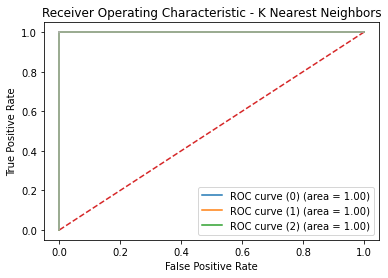

In [51]:
y_test_binarized = label_binarize(Y_test, classes = [0,1,2])
y_t1 = y_test_binarized[:, 0]
y_t2 = y_test_binarized[:, 1]
y_t3 = y_test_binarized[:, 2]
y_s1 = knn2.predict_proba(X_test)[:, 0]
y_s2 = knn2.predict_proba(X_test)[:, 1]
y_s3 = knn2.predict_proba(X_test)[:, 2]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_t1, y_s1, pos_label = 1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_t2, y_s2, pos_label = 1)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_t3, y_s3, pos_label = 1)
roc_auc_1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc_2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc_3 = auc(false_positive_rate3, true_positive_rate3)

# Plot
plt.subplots()
plt.title('Receiver Operating Characteristic - K Nearest Neighbors')
plt.plot(false_positive_rate1, true_positive_rate1, label = 'ROC curve (0) (area = %0.2f)'% roc_auc_1)
plt.plot(false_positive_rate2, true_positive_rate2, label = 'ROC curve (1) (area = %0.2f)'% roc_auc_2)
plt.plot(false_positive_rate3, true_positive_rate3, label = 'ROC curve (2) (area = %0.2f)'% roc_auc_3)
plt.plot([0, 1], ls = "--")
plt.plot([0, 0], [1, 0] , c = ".7"), plt.plot([1, 1] , c = ".7")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()

### Now we perform the same experiment using Naive Bayes

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      0.82      0.87        17
           2       0.82      1.00      0.90         9

    accuracy                           0.89        36
   macro avg       0.88      0.91      0.89        36
weighted avg       0.90      0.89      0.89        36


Accuracy Score: 0.8888888888888888

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.600, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.600, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.571, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ...............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... var_smoothing=0.2154434690031884, score=0.714, total=   0.0s
[CV] var_smoothing=0.2154434690031884 ................................
[CV] .... var_smoothing=0.2154434690031884, score=0.571, total=   0.0s
[CV] var_smoothing=0.2154434690031884 ................................
[CV] .... var_smoothing=0.2154434690031884, score=0.714, total=   0.0s
[CV] var_smoothing=0.2154434690031884 ................................
[CV] .... var_smoothing=0.2154434690031884, score=0.643, total=   0.0s
[CV] var_smoothing=0.2154434690031884 ................................
[CV] .... var_smoothing=0.2154434690031884, score=0.786, total=   0.0s
[CV] var_smoothing=0.2154434690031884 ................................
[CV] .... var_smoothing=0.2154434690031884, score=0.714, total=   0.0s
[CV] var_smoothing=0.1668100537200059 ................................
[CV] .... var_smoothing=0.1668100537200059, score=0.733, total=   0.0s
[CV] var_smoothing=0.1668100537200059 ................................
[CV] .

[CV] .. var_smoothing=0.046415888336127795, score=0.929, total=   0.0s
[CV] var_smoothing=0.046415888336127795 ..............................
[CV] .. var_smoothing=0.046415888336127795, score=0.643, total=   0.0s
[CV] var_smoothing=0.03593813663804628 ...............................
[CV] ... var_smoothing=0.03593813663804628, score=0.733, total=   0.0s
[CV] var_smoothing=0.03593813663804628 ...............................
[CV] ... var_smoothing=0.03593813663804628, score=0.733, total=   0.0s
[CV] var_smoothing=0.03593813663804628 ...............................
[CV] ... var_smoothing=0.03593813663804628, score=0.714, total=   0.0s
[CV] var_smoothing=0.03593813663804628 ...............................
[CV] ... var_smoothing=0.03593813663804628, score=0.571, total=   0.0s
[CV] var_smoothing=0.03593813663804628 ...............................
[CV] ... var_smoothing=0.03593813663804628, score=0.643, total=   0.0s
[CV] var_smoothing=0.03593813663804628 ...............................
[CV] .

[CV] .. var_smoothing=0.007742636826811269, score=0.786, total=   0.0s
[CV] var_smoothing=0.007742636826811269 ..............................
[CV] .. var_smoothing=0.007742636826811269, score=0.571, total=   0.0s
[CV] var_smoothing=0.007742636826811269 ..............................
[CV] .. var_smoothing=0.007742636826811269, score=0.643, total=   0.0s
[CV] var_smoothing=0.007742636826811269 ..............................
[CV] .. var_smoothing=0.007742636826811269, score=0.643, total=   0.0s
[CV] var_smoothing=0.007742636826811269 ..............................
[CV] .. var_smoothing=0.007742636826811269, score=0.643, total=   0.0s
[CV] var_smoothing=0.007742636826811269 ..............................
[CV] .. var_smoothing=0.007742636826811269, score=0.571, total=   0.0s
[CV] var_smoothing=0.007742636826811269 ..............................
[CV] .. var_smoothing=0.007742636826811269, score=1.000, total=   0.0s
[CV] var_smoothing=0.007742636826811269 ..............................
[CV] .

[CV] .. var_smoothing=0.001291549665014884, score=0.733, total=   0.0s
[CV] var_smoothing=0.001291549665014884 ..............................
[CV] .. var_smoothing=0.001291549665014884, score=0.786, total=   0.0s
[CV] var_smoothing=0.001291549665014884 ..............................
[CV] .. var_smoothing=0.001291549665014884, score=0.714, total=   0.0s
[CV] var_smoothing=0.001291549665014884 ..............................
[CV] .. var_smoothing=0.001291549665014884, score=0.714, total=   0.0s
[CV] var_smoothing=0.001291549665014884 ..............................
[CV] .. var_smoothing=0.001291549665014884, score=0.643, total=   0.0s
[CV] var_smoothing=0.001291549665014884 ..............................
[CV] .. var_smoothing=0.001291549665014884, score=0.714, total=   0.0s
[CV] var_smoothing=0.001291549665014884 ..............................
[CV] .. var_smoothing=0.001291549665014884, score=0.714, total=   0.0s
[CV] var_smoothing=0.001291549665014884 ..............................
[CV] .

[CV]  var_smoothing=0.00021544346900318845, score=0.857, total=   0.0s
[CV] var_smoothing=0.00021544346900318845 ............................
[CV]  var_smoothing=0.00021544346900318845, score=0.857, total=   0.0s
[CV] var_smoothing=0.00021544346900318845 ............................
[CV]  var_smoothing=0.00021544346900318845, score=0.786, total=   0.0s
[CV] var_smoothing=0.00021544346900318845 ............................
[CV]  var_smoothing=0.00021544346900318845, score=1.000, total=   0.0s
[CV] var_smoothing=0.00021544346900318845 ............................
[CV]  var_smoothing=0.00021544346900318845, score=0.786, total=   0.0s
[CV] var_smoothing=0.0001668100537200059 .............................
[CV] . var_smoothing=0.0001668100537200059, score=0.867, total=   0.0s
[CV] var_smoothing=0.0001668100537200059 .............................
[CV] . var_smoothing=0.0001668100537200059, score=0.867, total=   0.0s
[CV] var_smoothing=0.0001668100537200059 .............................
[CV] .

[CV] . var_smoothing=4.641588833612782e-05, score=1.000, total=   0.0s
[CV] var_smoothing=4.641588833612782e-05 .............................
[CV] . var_smoothing=4.641588833612782e-05, score=1.000, total=   0.0s
[CV] var_smoothing=4.641588833612782e-05 .............................
[CV] . var_smoothing=4.641588833612782e-05, score=0.929, total=   0.0s
[CV] var_smoothing=4.641588833612782e-05 .............................
[CV] . var_smoothing=4.641588833612782e-05, score=1.000, total=   0.0s
[CV] var_smoothing=4.641588833612782e-05 .............................
[CV] . var_smoothing=4.641588833612782e-05, score=1.000, total=   0.0s
[CV] var_smoothing=3.5938136638046256e-05 ............................
[CV]  var_smoothing=3.5938136638046256e-05, score=0.933, total=   0.0s
[CV] var_smoothing=3.5938136638046256e-05 ............................
[CV]  var_smoothing=3.5938136638046256e-05, score=0.933, total=   0.0s
[CV] var_smoothing=3.5938136638046256e-05 ............................
[CV]  

[CV] ................. var_smoothing=1e-05, score=1.000, total=   0.0s
[CV] var_smoothing=7.742636826811277e-06 .............................
[CV] . var_smoothing=7.742636826811277e-06, score=1.000, total=   0.0s
[CV] var_smoothing=7.742636826811277e-06 .............................
[CV] . var_smoothing=7.742636826811277e-06, score=1.000, total=   0.0s
[CV] var_smoothing=7.742636826811277e-06 .............................
[CV] . var_smoothing=7.742636826811277e-06, score=0.929, total=   0.0s
[CV] var_smoothing=7.742636826811277e-06 .............................
[CV] . var_smoothing=7.742636826811277e-06, score=1.000, total=   0.0s
[CV] var_smoothing=7.742636826811277e-06 .............................
[CV] . var_smoothing=7.742636826811277e-06, score=0.929, total=   0.0s
[CV] var_smoothing=7.742636826811277e-06 .............................
[CV] . var_smoothing=7.742636826811277e-06, score=1.000, total=   0.0s
[CV] var_smoothing=7.742636826811277e-06 .............................
[CV] .

[CV]  var_smoothing=1.6681005372000591e-06, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000591e-06 ............................
[CV]  var_smoothing=1.6681005372000591e-06, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000591e-06 ............................
[CV]  var_smoothing=1.6681005372000591e-06, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000591e-06 ............................
[CV]  var_smoothing=1.6681005372000591e-06, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000591e-06 ............................
[CV]  var_smoothing=1.6681005372000591e-06, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000591e-06 ............................
[CV]  var_smoothing=1.6681005372000591e-06, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000591e-06 ............................
[CV]  var_smoothing=1.6681005372000591e-06, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000591e-06 ............................
[CV]  

[CV] . var_smoothing=2.782559402207126e-07, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-07 .............................
[CV] . var_smoothing=2.782559402207126e-07, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-07 .............................
[CV] . var_smoothing=2.782559402207126e-07, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-07 .............................
[CV] . var_smoothing=2.782559402207126e-07, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-07 .............................
[CV] . var_smoothing=2.782559402207126e-07, score=0.929, total=   0.0s
[CV] var_smoothing=2.782559402207126e-07 .............................
[CV] . var_smoothing=2.782559402207126e-07, score=0.929, total=   0.0s
[CV] var_smoothing=2.782559402207126e-07 .............................
[CV] . var_smoothing=2.782559402207126e-07, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-07 .............................
[CV] .

[CV] . var_smoothing=5.994842503189421e-08, score=1.000, total=   0.0s
[CV] var_smoothing=5.994842503189421e-08 .............................
[CV] . var_smoothing=5.994842503189421e-08, score=1.000, total=   0.0s
[CV] var_smoothing=5.994842503189421e-08 .............................
[CV] . var_smoothing=5.994842503189421e-08, score=1.000, total=   0.0s
[CV] var_smoothing=4.641588833612782e-08 .............................
[CV] . var_smoothing=4.641588833612782e-08, score=1.000, total=   0.0s
[CV] var_smoothing=4.641588833612782e-08 .............................
[CV] . var_smoothing=4.641588833612782e-08, score=1.000, total=   0.0s
[CV] var_smoothing=4.641588833612782e-08 .............................
[CV] . var_smoothing=4.641588833612782e-08, score=1.000, total=   0.0s
[CV] var_smoothing=4.641588833612782e-08 .............................
[CV] . var_smoothing=4.641588833612782e-08, score=1.000, total=   0.0s
[CV] var_smoothing=4.641588833612782e-08 .............................
[CV] .

[CV]  var_smoothing=2.1544346900318866e-09, score=1.000, total=   0.0s
[CV] var_smoothing=2.1544346900318866e-09 ............................
[CV]  var_smoothing=2.1544346900318866e-09, score=1.000, total=   0.0s
[CV] var_smoothing=2.1544346900318866e-09 ............................
[CV]  var_smoothing=2.1544346900318866e-09, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000625e-09 ............................
[CV]  var_smoothing=1.6681005372000625e-09, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000625e-09 ............................
[CV]  var_smoothing=1.6681005372000625e-09, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000625e-09 ............................
[CV]  var_smoothing=1.6681005372000625e-09, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000625e-09 ............................
[CV]  var_smoothing=1.6681005372000625e-09, score=1.000, total=   0.0s
[CV] var_smoothing=1.6681005372000625e-09 ............................
[CV]  

[CV] . var_smoothing=3.593813663804626e-10, score=1.000, total=   0.0s
[CV] var_smoothing=3.593813663804626e-10 .............................
[CV] . var_smoothing=3.593813663804626e-10, score=1.000, total=   0.0s
[CV] var_smoothing=3.593813663804626e-10 .............................
[CV] . var_smoothing=3.593813663804626e-10, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-10 .............................
[CV] . var_smoothing=2.782559402207126e-10, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-10 .............................
[CV] . var_smoothing=2.782559402207126e-10, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-10 .............................
[CV] . var_smoothing=2.782559402207126e-10, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-10 .............................
[CV] . var_smoothing=2.782559402207126e-10, score=1.000, total=   0.0s
[CV] var_smoothing=2.782559402207126e-10 .............................
[CV] .

[CV] . var_smoothing=5.994842503189421e-11, score=1.000, total=   0.0s
[CV] var_smoothing=5.994842503189421e-11 .............................
[CV] . var_smoothing=5.994842503189421e-11, score=1.000, total=   0.0s
[CV] var_smoothing=5.994842503189421e-11 .............................
[CV] . var_smoothing=5.994842503189421e-11, score=1.000, total=   0.0s
[CV] var_smoothing=5.994842503189421e-11 .............................
[CV] . var_smoothing=5.994842503189421e-11, score=1.000, total=   0.0s
[CV] var_smoothing=5.994842503189421e-11 .............................
[CV] . var_smoothing=5.994842503189421e-11, score=0.929, total=   0.0s
[CV] var_smoothing=5.994842503189421e-11 .............................
[CV] . var_smoothing=5.994842503189421e-11, score=1.000, total=   0.0s
[CV] var_smoothing=5.994842503189421e-11 .............................
[CV] . var_smoothing=5.994842503189421e-11, score=1.000, total=   0.0s
[CV] var_smoothing=5.994842503189421e-11 .............................
[CV] .

[CV] ................. var_smoothing=1e-11, score=1.000, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=1.000, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=0.929, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=1.000, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=1.000, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=1.000, total=   0.0s
[CV] var_smoothing=1e-11 .............................................
[CV] ................. var_smoothing=1e-11, score=1.000, total=   0.0s

Best var_smoothing: 2.782559402207126e-06
Best Score is 0.9438095238095239



[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.7s finished


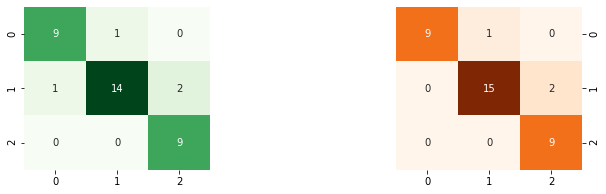

In [59]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
Y=Y.ravel()

# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=seed)

nb = GaussianNB()
nb.fit(X_train, Y_train)
prediction = nb.predict(X_test)

# ROC Score
cm = metrics.confusion_matrix(Y_test, prediction)
print(metrics.classification_report(Y_test, prediction))
accuracy = metrics.accuracy_score(Y_test, prediction)
print('')
print("Accuracy Score:", metrics.accuracy_score(Y_test, prediction))
print('')
param_grid_nb = {
    'var_smoothing' : np.logspace(0, -11, 100)
}
nb_2 = GaussianNB()

# Use GridSearchCV
nbModel = GridSearchCV(nb_2, param_grid_nb, verbose=3, cv = 10)

best_model=nbModel.fit(X_train,Y_train)
print('')
print('Best var_smoothing:', best_model.best_estimator_.get_params()['var_smoothing'])
print("Best Score is {}".format(grid.best_score_))

# Naive Bayes After Finetuning
nb2 = GaussianNB(var_smoothing = best_model.best_estimator_.get_params()['var_smoothing'])
nb2.fit(X_train, Y_train)
prediction2 = nb2.predict(X_test)

# ROC Score
roc_auc_prediction2 = nb2.predict_proba(X_test)
print('')
print(metrics.classification_report(Y_test, prediction2))
accuracy2 = metrics.accuracy_score(Y_test, prediction2)
print('')
cm2 = metrics.confusion_matrix(Y_test, prediction2)
print('')
print("Accuracy Score:", metrics.accuracy_score(Y_test, prediction2))

print('')
cv = cross_validate(nb2, X, Y, cv = 10)
print('Test Score for 10-Fold CV:',cv['test_score'])
print('')
print("Heatmap of Confusion Matrix Before and After Finetuning:")

# Confusion Matrix Before and After Finetuning
fig, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))
fig.subplots_adjust(wspace = 1)
sns.heatmap(cm, cmap = "Greens", annot = True, cbar = False, ax = axis1, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])
sns.heatmap(cm2, cmap = "Oranges", annot = True, cbar = False, ax = axis2, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])
axis2.yaxis.tick_right()
fig.subplots_adjust(wspace = 1)
plt.show()

In [60]:
def print_metrics(clf):

    #Obtaining accuracy score and f-scores for each class
    acc = accuracy_score(Y_test, pred_Y)
    a = classification_report(Y_test, pred_Y,digits=4) 

    #Obtaining confusion matrix and illustrating it as a heatmap
    b = confusion_matrix(Y_test, pred_Y) 

    print(a)
    print(b)
    c=sns.heatmap(b, cmap = "Blues", annot = True, cbar = False, xticklabels = ["1", "2", "3"], yticklabels = ["1", "2", "3"])
    c.set(xlabel='Class', ylabel='Class')

              precision    recall  f1-score   support

           0     0.8750    0.7000    0.7778        10
           1     0.8333    0.8824    0.8571        17
           2     0.8000    0.8889    0.8421         9

    accuracy                         0.8333        36
   macro avg     0.8361    0.8237    0.8257        36
weighted avg     0.8366    0.8333    0.8313        36

[[ 7  3  0]
 [ 0 15  2]
 [ 1  0  8]]


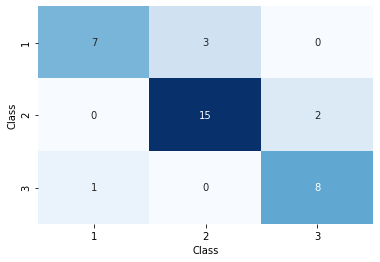

In [61]:
NB2 =  MultinomialNB()

NB2.fit(X_train, Y_train)
pred_Y= NB2.predict(X_test)

print_metrics(NB2)

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        10
           1     0.4722    1.0000    0.6415        17
           2     0.0000    0.0000    0.0000         9

    accuracy                         0.4722        36
   macro avg     0.1574    0.3333    0.2138        36
weighted avg     0.2230    0.4722    0.3029        36

[[ 0 10  0]
 [ 0 17  0]
 [ 0  9  0]]


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


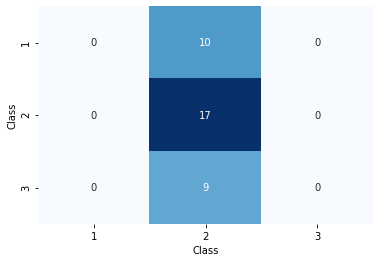

In [62]:
NB3 = BernoulliNB()
NB3.fit(X_train, Y_train)
pred_Y= NB3.predict(X_test)

print_metrics(NB3)

### ROC Curve for Naive Bayes (After Finetuning)

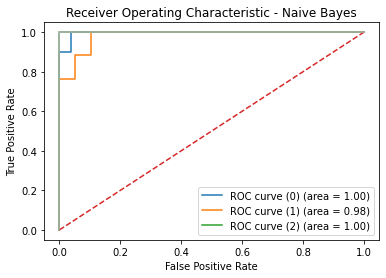

In [63]:
y_test_binarized = label_binarize(Y_test, classes = [0,1,2])
y_t1 = y_test_binarized[:, 0]
y_t2 = y_test_binarized[:, 1]
y_t3 = y_test_binarized[:, 2]
y_s1 = nb2.predict_proba(X_test)[:, 0]
y_s2 = nb2.predict_proba(X_test)[:, 1]
y_s3 = nb2.predict_proba(X_test)[:, 2]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_t1, y_s1, pos_label = 1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_t2, y_s2, pos_label = 1)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_t3, y_s3, pos_label = 1)
roc_auc_1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc_2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc_3 = auc(false_positive_rate3, true_positive_rate3)

# Plot
plt.subplots()
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1, label = 'ROC curve (0) (area = %0.2f)'% roc_auc_1)
plt.plot(false_positive_rate2, true_positive_rate2, label = 'ROC curve (1) (area = %0.2f)'% roc_auc_2)
plt.plot(false_positive_rate3, true_positive_rate3, label = 'ROC curve (2) (area = %0.2f)'% roc_auc_3)
plt.plot([0, 1], ls = "--")
plt.plot([0, 0], [1, 0] , c = ".7"), plt.plot([1, 1] , c = ".7")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()

### Neural Network

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        17
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


predictions:  [1 1 1 1 2 1 2 0 0 2 2 1 0 1 1 0 0 2 2 2 0 1 1 2 1 2 0 0 0 1 0 2 1 1 1 1]
accuracy:  0.9722222222222222


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: 

Test Score for 10-Fold CV: [0.94444444 0.94444444 0.94444444 0.94444444 1.         1.
 1.         1.         1.         1.        ]

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] activation=identity, solver=lbfgs ...............................
[CV] ... activation=identity, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=identity, solver=lbfgs ...............................
[CV] ... activation=identity, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=identity, solver=lbfgs ...............................
[CV] ... activation=identity, solver=lbfgs, score=0.929, total=   0.0s
[CV] activation=identity, solver=lbfgs ...............................
[CV] ... activation=identity, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=identity, solver=lbfgs ...............................
[CV] ... activation=identity, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=identity, solver=lbfgs ...............................
[CV] ... activation=ide

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=identity, solver=sgd, score=1.000, total=   0.1s
[CV] activation=identity, solver=sgd .................................
[CV] ..... activation=identity, solver=sgd, score=1.000, total=   0.1s
[CV] activation=identity, solver=sgd .................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=identity, solver=sgd, score=0.857, total=   0.2s
[CV] activation=identity, solver=sgd .................................
[CV] ..... activation=identity, solver=sgd, score=1.000, total=   0.2s
[CV] activation=identity, solver=sgd .................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=identity, solver=sgd, score=1.000, total=   0.2s
[CV] activation=identity, solver=sgd .................................
[CV] ..... activation=identity, solver=sgd, score=1.000, total=   0.2s
[CV] activation=identity, solver=sgd .................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=identity, solver=sgd, score=1.000, total=   0.1s
[CV] activation=identity, solver=sgd .................................
[CV] ..... activation=identity, solver=sgd, score=1.000, total=   0.1s
[CV] activation=identity, solver=sgd .................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=identity, solver=sgd, score=1.000, total=   0.1s
[CV] activation=identity, solver=sgd .................................
[CV] ..... activation=identity, solver=sgd, score=0.929, total=   0.1s
[CV] activation=identity, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... activation=identity, solver=adam, score=1.000, total=   0.2s
[CV] activation=identity, solver=adam ................................
[CV] .... activation=identity, solver=adam, score=0.933, total=   0.2s
[CV] activation=identity, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... activation=identity, solver=adam, score=1.000, total=   0.2s
[CV] activation=identity, solver=adam ................................
[CV] .... activation=identity, solver=adam, score=1.000, total=   0.2s
[CV] activation=identity, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... activation=identity, solver=adam, score=1.000, total=   0.2s
[CV] activation=identity, solver=adam ................................
[CV] .... activation=identity, solver=adam, score=1.000, total=   0.1s
[CV] activation=identity, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... activation=identity, solver=adam, score=1.000, total=   0.1s
[CV] activation=identity, solver=adam ................................
[CV] .... activation=identity, solver=adam, score=1.000, total=   0.1s
[CV] activation=identity, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

[CV] .... activation=identity, solver=adam, score=1.000, total=   0.1s
[CV] activation=identity, solver=adam ................................
[CV] .... activation=identity, solver=adam, score=0.929, total=   0.1s
[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=0.933, total=   0.0s
[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=0.929, total=   0.0s
[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=1.000, total=   0.0s

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\


[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=logistic, solver=lbfgs ...............................
[CV] ... activation=logistic, solver=lbfgs, score=0.929, total=   0.0s
[CV] activation=logistic, solver=sgd .................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=logistic, solver=sgd, score=1.000, total=   0.1s
[CV] activation=logistic, solver=sgd .................................
[CV] ..... activation=logistic, solver=sgd, score=0.733, total=   0.1s
[CV] activation=logistic, solver=sgd .................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=logistic, solver=sgd, score=0.786, total=   0.1s
[CV] activation=logistic, solver=sgd .................................
[CV] ..... activation=logistic, solver=sgd, score=1.000, total=   0.1s
[CV] activation=logistic, solver=sgd .................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=logistic, solver=sgd, score=1.000, total=   0.1s
[CV] activation=logistic, solver=sgd .................................
[CV] ..... activation=logistic, solver=sgd, score=0.929, total=   0.1s
[CV] activation=logistic, solver=sgd .................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=logistic, solver=sgd, score=0.929, total=   0.1s
[CV] activation=logistic, solver=sgd .................................
[CV] ..... activation=logistic, solver=sgd, score=1.000, total=   0.1s
[CV] activation=logistic, solver=sgd .................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..... activation=logistic, solver=sgd, score=0.786, total=   0.1s
[CV] activation=logistic, solver=sgd .................................
[CV] ..... activation=logistic, solver=sgd, score=0.929, total=   0.1s
[CV] activation=logistic, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... activation=logistic, solver=adam, score=1.000, total=   0.1s
[CV] activation=logistic, solver=adam ................................
[CV] .... activation=logistic, solver=adam, score=0.933, total=   0.2s
[CV] activation=logistic, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... activation=logistic, solver=adam, score=0.857, total=   0.1s
[CV] activation=logistic, solver=adam ................................
[CV] .... activation=logistic, solver=adam, score=1.000, total=   0.1s
[CV] activation=logistic, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... activation=logistic, solver=adam, score=1.000, total=   0.2s
[CV] activation=logistic, solver=adam ................................
[CV] .... activation=logistic, solver=adam, score=1.000, total=   0.2s
[CV] activation=logistic, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... activation=logistic, solver=adam, score=1.000, total=   0.2s
[CV] activation=logistic, solver=adam ................................
[CV] .... activation=logistic, solver=adam, score=1.000, total=   0.2s
[CV] activation=logistic, solver=adam ................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .... activation=logistic, solver=adam, score=1.000, total=   0.2s
[CV] activation=logistic, solver=adam ................................
[CV] .... activation=logistic, solver=adam, score=0.929, total=   0.2s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=1.000, total=   0.0s

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\


[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=0.933, total=   0.0s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=0.929, total=   0.0s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=tanh, solver=lbfgs ...................................
[CV] ....... activation=tanh, solver=lbfgs, score=1.000, total=   0.0s
[CV] 

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... activation=tanh, solver=sgd, score=1.000, total=   0.2s
[CV] activation=tanh, solver=sgd .....................................
[CV] ......... activation=tanh, solver=sgd, score=0.933, total=   0.2s
[CV] activation=tanh, solver=sgd .....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... activation=tanh, solver=sgd, score=0.929, total=   0.2s
[CV] activation=tanh, solver=sgd .....................................
[CV] ......... activation=tanh, solver=sgd, score=1.000, total=   0.2s
[CV] activation=tanh, solver=sgd .....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... activation=tanh, solver=sgd, score=1.000, total=   0.2s
[CV] activation=tanh, solver=sgd .....................................
[CV] ......... activation=tanh, solver=sgd, score=1.000, total=   0.1s
[CV] activation=tanh, solver=sgd .....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... activation=tanh, solver=sgd, score=1.000, total=   0.2s
[CV] activation=tanh, solver=sgd .....................................
[CV] ......... activation=tanh, solver=sgd, score=1.000, total=   0.1s
[CV] activation=tanh, solver=sgd .....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... activation=tanh, solver=sgd, score=1.000, total=   0.2s
[CV] activation=tanh, solver=sgd .....................................
[CV] ......... activation=tanh, solver=sgd, score=0.929, total=   0.1s
[CV] activation=tanh, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ activation=tanh, solver=adam, score=1.000, total=   0.2s
[CV] activation=tanh, solver=adam ....................................
[CV] ........ activation=tanh, solver=adam, score=0.933, total=   0.2s
[CV] activation=tanh, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ activation=tanh, solver=adam, score=0.929, total=   0.2s
[CV] activation=tanh, solver=adam ....................................
[CV] ........ activation=tanh, solver=adam, score=1.000, total=   0.1s
[CV] activation=tanh, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ activation=tanh, solver=adam, score=1.000, total=   0.1s
[CV] activation=tanh, solver=adam ....................................
[CV] ........ activation=tanh, solver=adam, score=1.000, total=   0.1s
[CV] activation=tanh, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ activation=tanh, solver=adam, score=1.000, total=   0.2s
[CV] activation=tanh, solver=adam ....................................
[CV] ........ activation=tanh, solver=adam, score=1.000, total=   0.2s
[CV] activation=tanh, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

[CV] ........ activation=tanh, solver=adam, score=1.000, total=   0.1s
[CV] activation=tanh, solver=adam ....................................
[CV] ........ activation=tanh, solver=adam, score=0.929, total=   0.1s
[CV] activation=relu, solver=lbfgs ...................................
[CV] ....... activation=relu, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=relu, solver=lbfgs ...................................
[CV] ....... activation=relu, solver=lbfgs, score=0.933, total=   0.0s
[CV] activation=relu, solver=lbfgs ...................................
[CV] ....... activation=relu, solver=lbfgs, score=0.929, total=   0.0s
[CV] activation=relu, solver=lbfgs ...................................
[CV] ....... activation=relu, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=relu, solver=lbfgs ...................................
[CV] ....... activation=relu, solver=lbfgs, score=1.000, total=   0.0s
[CV] activation=relu, solver=lbfgs ...................................
[CV] .

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\utils\

[CV] ......... activation=relu, solver=sgd, score=1.000, total=   0.2s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=1.000, total=   0.2s
[CV] activation=relu, solver=sgd .....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... activation=relu, solver=sgd, score=0.929, total=   0.2s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=0.929, total=   0.2s
[CV] activation=relu, solver=sgd .....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... activation=relu, solver=sgd, score=1.000, total=   0.2s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=1.000, total=   0.2s
[CV] activation=relu, solver=sgd .....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... activation=relu, solver=sgd, score=1.000, total=   0.2s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=1.000, total=   0.2s
[CV] activation=relu, solver=sgd .....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... activation=relu, solver=sgd, score=1.000, total=   0.2s
[CV] activation=relu, solver=sgd .....................................
[CV] ......... activation=relu, solver=sgd, score=0.929, total=   0.2s
[CV] activation=relu, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ activation=relu, solver=adam, score=1.000, total=   0.2s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=0.933, total=   0.2s
[CV] activation=relu, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ activation=relu, solver=adam, score=0.929, total=   0.2s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=1.000, total=   0.2s
[CV] activation=relu, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ activation=relu, solver=adam, score=1.000, total=   0.2s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=1.000, total=   0.2s
[CV] activation=relu, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ activation=relu, solver=adam, score=1.000, total=   0.2s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=1.000, total=   0.2s
[CV] activation=relu, solver=adam ....................................


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   12.8s finished
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ activation=relu, solver=adam, score=1.000, total=   0.2s
[CV] activation=relu, solver=adam ....................................
[CV] ........ activation=relu, solver=adam, score=0.929, total=   0.2s


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best activation: identity
Best solver: adam
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        17
           2       0.90      1.00      0.95         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36


Confusion Matrix:
[[10  0  0]
 [ 0 16  1]
 [ 0  0  9]]
Accuracy Score: 0.9722222222222222


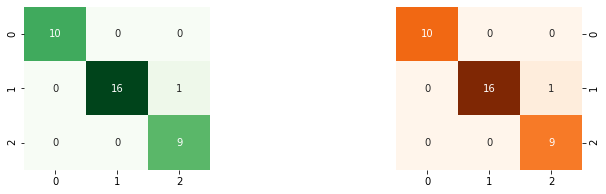

In [64]:
# @ignore_warnings(category = ConvergenceWarning)
# @ignore_warnings(category = UndefinedMetricWarning)

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=seed)

nn = MLPClassifier()
nn.fit(X_train, Y_train)
prediction = nn.predict(X_test)

# ROC Score
cm = metrics.confusion_matrix(Y_test, prediction)
print(metrics.classification_report(Y_test, prediction))
accuracy = metrics.accuracy_score(Y_test, prediction)
print('')
print("predictions: ", prediction)
print("accuracy: ", accuracy)

cv = cross_validate(nn, X, Y, cv = 10)
print('Test Score for 10-Fold CV:',cv['test_score'])
print('')

# Hyperparameter List for Finetuning
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
hyperparameters = dict(activation = activation, solver = solver)

# New NN
nn_2 = MLPClassifier()

# Use GridSearchCV
clf = GridSearchCV(nn_2, hyperparameters, verbose=3, cv = 10)
best_model = clf.fit(X_train,Y_train)

# Print the Value of Best Hyperparameters
print('Best activation:', best_model.best_estimator_.get_params()['activation'])
print('Best solver:', best_model.best_estimator_.get_params()['solver'])

# Neural Network After Finetuning
print('=' * 100)
nn2 = MLPClassifier(activation = best_model.best_estimator_.get_params()['activation'], solver = best_model.best_estimator_.get_params()['solver'])
nn2.fit(X_train, Y_train)
prediction2 = nn2.predict(X_test)

cm2 = metrics.confusion_matrix(Y_test, prediction2)
print(metrics.classification_report(Y_test, prediction2))
accuracy2 = metrics.accuracy_score(Y_test, prediction2)
print('')

# Evaluation Metrics
print("Confusion Matrix:")
print( metrics.confusion_matrix(Y_test, prediction2))
print("Accuracy Score:", metrics.accuracy_score(Y_test, prediction2))

# Confusion Matrix Before and After Finetuning
fig, (axis1, axis2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))
fig.subplots_adjust(wspace = 1)
sns.heatmap(cm, cmap = "Greens", annot = True, cbar = False, ax = axis1, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])
sns.heatmap(cm2, cmap = "Oranges", annot = True, cbar = False, ax = axis2, xticklabels = ["0", "1", "2"], yticklabels = ["0", "1", "2"])
axis2.yaxis.tick_right()
fig.subplots_adjust(wspace = 1)
plt.show()

### ROC for Neural Network (After Finetuning)

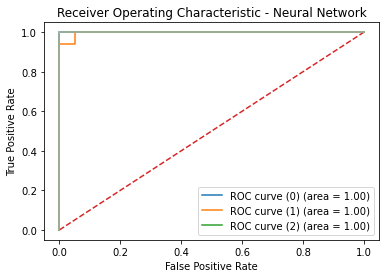

In [65]:
y_test_binarized = label_binarize(Y_test, classes = [0,1,2])
y_t1 = y_test_binarized[:, 0]
y_t2 = y_test_binarized[:, 1]
y_t3 = y_test_binarized[:, 2]
y_s1 = nn2.predict_proba(X_test)[:, 0]
y_s2 = nn2.predict_proba(X_test)[:, 1]
y_s3 = nn2.predict_proba(X_test)[:, 2]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_t1, y_s1, pos_label = 1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_t2, y_s2, pos_label = 1)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_t3, y_s3, pos_label = 1)
roc_auc_1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc_2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc_3 = auc(false_positive_rate3, true_positive_rate3)
# Plot
plt.subplots()
plt.title('Receiver Operating Characteristic - Neural Network')
plt.plot(false_positive_rate1, true_positive_rate1, label = 'ROC curve (0) (area = %0.2f)'% roc_auc_1)
plt.plot(false_positive_rate2, true_positive_rate2, label = 'ROC curve (1) (area = %0.2f)'% roc_auc_2)
plt.plot(false_positive_rate3, true_positive_rate3, label = 'ROC curve (2) (area = %0.2f)'% roc_auc_3)
plt.plot([0, 1], ls = "--")
plt.plot([0, 0], [1, 0] , c = ".7"), plt.plot([1, 1] , c = ".7")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)
plt.show()